In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('updated_pollution_dataset.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Temperature                    5000 non-null   float64
 1   Humidity                       5000 non-null   float64
 2   PM2.5                          5000 non-null   float64
 3   PM10                           5000 non-null   float64
 4   NO2                            5000 non-null   float64
 5   SO2                            5000 non-null   float64
 6   CO                             5000 non-null   float64
 7   Proximity_to_Industrial_Areas  5000 non-null   float64
 8   Population_Density             5000 non-null   int64  
 9   Air Quality                    5000 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 390.8+ KB


In [7]:
df.head()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good


In [9]:
df.isnull().sum()

Temperature                      0
Humidity                         0
PM2.5                            0
PM10                             0
NO2                              0
SO2                              0
CO                               0
Proximity_to_Industrial_Areas    0
Population_Density               0
Air Quality                      0
dtype: int64

In [11]:
air_quality_map = {'Hazardous' : 0, 'Poor' : 1, 'Moderate': 2, 'Good' : 3 }
df['Air Quality'] = df['Air Quality'].map(air_quality_map)

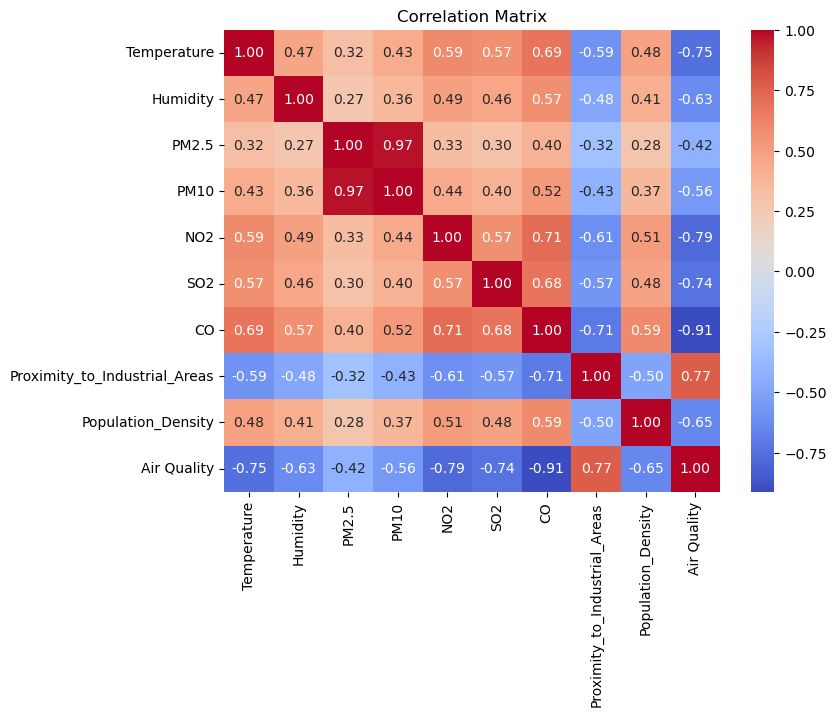

In [13]:
correlation_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix")
plt.show()

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
X = df.drop('Air Quality', axis=1)
y = df['Air Quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
feature_importance = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns,'Importance': feature_importance}).sort_values(by='Importance', ascending=False)
print(feature_importance_df)

                         Feature  Importance
6                             CO    0.334678
7  Proximity_to_Industrial_Areas    0.287712
4                            NO2    0.099142
5                            SO2    0.092587
0                    Temperature    0.073776
8             Population_Density    0.041929
1                       Humidity    0.034426
3                           PM10    0.022763
2                          PM2.5    0.012987


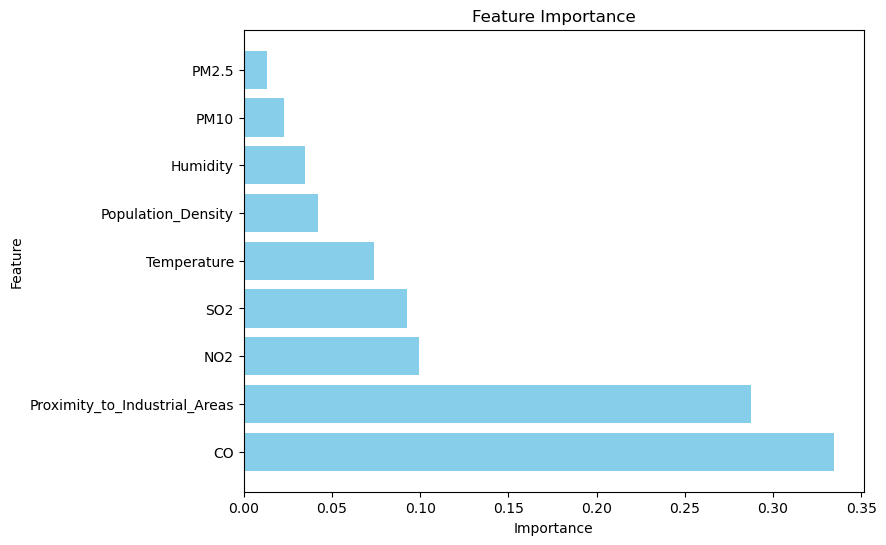

In [17]:
plt.figure(figsize=(8, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

In [19]:
initial_memory = df.memory_usage(deep=True).sum() / 1024**2 
optimized_df = df.copy()
for col in optimized_df.select_dtypes(include=['float64']).columns:
    optimized_df[col] = optimized_df[col].astype('float32')
for col in optimized_df.select_dtypes(include=['int64']).columns:
    optimized_df[col] = optimized_df[col].astype('int32')
X = optimized_df.drop('Air Quality', axis=1)
y = optimized_df['Air Quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
train_memory = X_train.memory_usage(deep=True).sum() / 1024**2 + y_train.memory_usage(deep=True) / 1024**2
test_memory = X_test.memory_usage(deep=True).sum() / 1024**2 + y_test.memory_usage(deep=True) / 1024**2
optimized_memory = optimized_df.memory_usage(deep=True).sum() / 1024**2
print("Initial Memory (MB):", initial_memory)
print("Optimized Memory (MB):", optimized_memory)
print("Training Data Memory (MB):", train_memory)
print("Testing Data Memory (MB):", test_memory)

Initial Memory (MB): 0.3815956115722656
Optimized Memory (MB): 0.19086074829101562
Training Data Memory (MB): 0.213623046875
Testing Data Memory (MB): 0.05340576171875


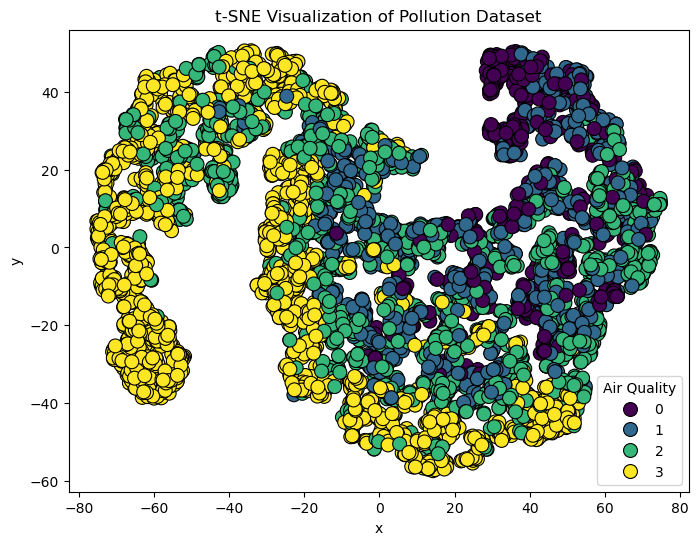

In [21]:
from sklearn.manifold import TSNE
X = df.drop('Air Quality', axis=1)
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(X)
df['x'] = tsne_results[:, 0]
df['y'] = tsne_results[:, 1]
plt.figure(figsize=(8, 6))
sns.scatterplot(x='x', y='y', data=df, hue='Air Quality', palette='viridis', s=100, edgecolor='k')
plt.title('t-SNE Visualization of Pollution Dataset')
plt.legend(title='Air Quality',loc='best')
plt.show()

Accuracy of Logistic Regression: 0.9470

Classification Report of Logistic Regression:
              precision    recall  f1-score   support

           0       0.93      0.81      0.87       111
           1       0.83      0.90      0.86       186
           2       0.96      0.96      0.96       294
           3       1.00      1.00      1.00       409

    accuracy                           0.95      1000
   macro avg       0.93      0.92      0.92      1000
weighted avg       0.95      0.95      0.95      1000



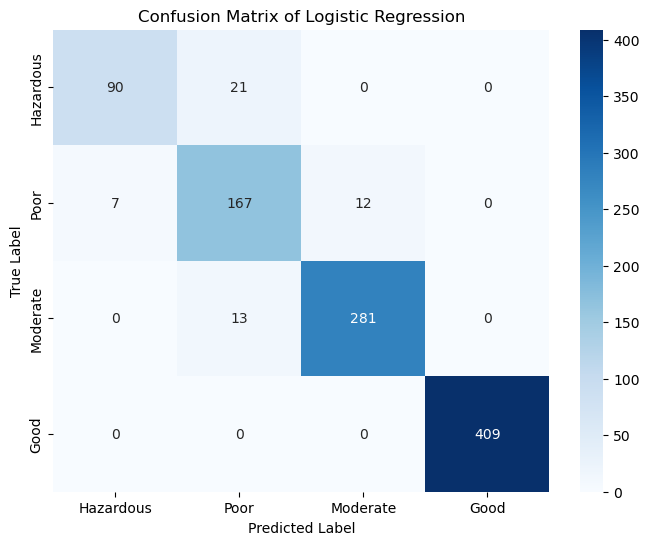

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
X = df.drop('Air Quality', axis=1)
y = df['Air Quality']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
log_reg_model = LogisticRegression(max_iter=2000, random_state=42)
log_reg_model.fit(X_train, y_train)
y_pred = log_reg_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Logistic Regression: {accuracy:.4f}")
print("\nClassification Report of Logistic Regression:")
print(classification_report(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Hazardous', 'Poor', 'Moderate', 'Good'], 
            yticklabels=['Hazardous', 'Poor', 'Moderate', 'Good'])
plt.title('Confusion Matrix of Logistic Regression')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

Accuracy of KNN: 0.9180

Classification Report of KNN:
              precision    recall  f1-score   support

           0       0.96      0.62      0.75       111
           1       0.77      0.88      0.82       186
           2       0.93      0.94      0.94       294
           3       0.98      1.00      0.99       409

    accuracy                           0.92      1000
   macro avg       0.91      0.86      0.87      1000
weighted avg       0.92      0.92      0.92      1000



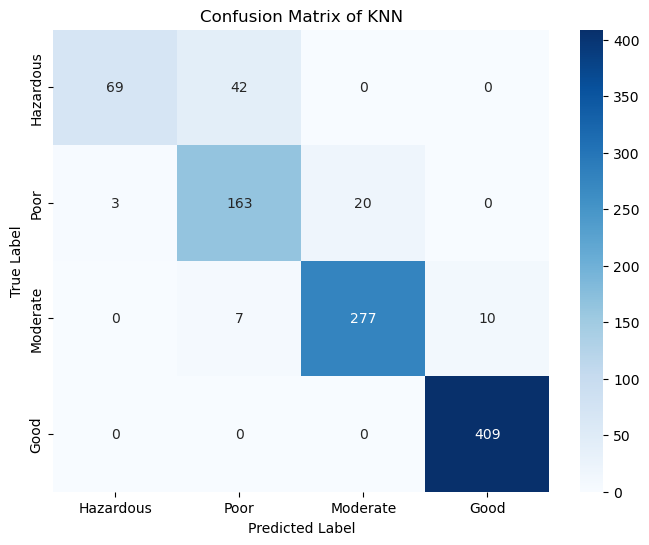

In [27]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=25)
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of KNN: {accuracy:.4f}")
print("\nClassification Report of KNN:")
print(classification_report(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Hazardous', 'Poor', 'Moderate', 'Good'], 
            yticklabels=['Hazardous', 'Poor', 'Moderate', 'Good'])
plt.title('Confusion Matrix of KNN')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

Accuracy of Decision Tree: 0.9190

Classification Report of Decision Tree:
              precision    recall  f1-score   support

           0       0.77      0.86      0.82       111
           1       0.80      0.78      0.79       186
           2       0.95      0.91      0.93       294
           3       0.99      1.00      1.00       409

    accuracy                           0.92      1000
   macro avg       0.88      0.89      0.88      1000
weighted avg       0.92      0.92      0.92      1000



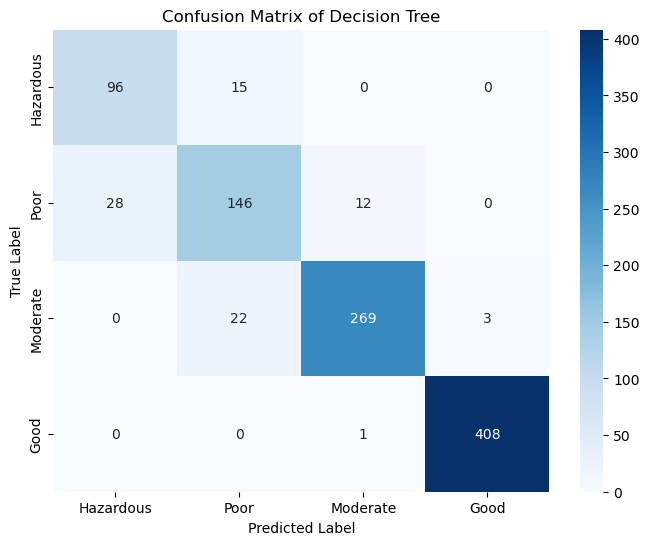

In [29]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Decision Tree: {accuracy:.4f}")
print("\nClassification Report of Decision Tree:")
print(classification_report(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Hazardous', 'Poor', 'Moderate', 'Good'], yticklabels=['Hazardous', 'Poor', 'Moderate', 'Good'])
plt.title('Confusion Matrix of Decision Tree')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

Accuracy of Random Forest: 0.9560

Classification Report of Random Forest:
              precision    recall  f1-score   support

           0       0.92      0.87      0.89       111
           1       0.87      0.90      0.88       186
           2       0.97      0.96      0.96       294
           3       1.00      1.00      1.00       409

    accuracy                           0.96      1000
   macro avg       0.94      0.93      0.94      1000
weighted avg       0.96      0.96      0.96      1000



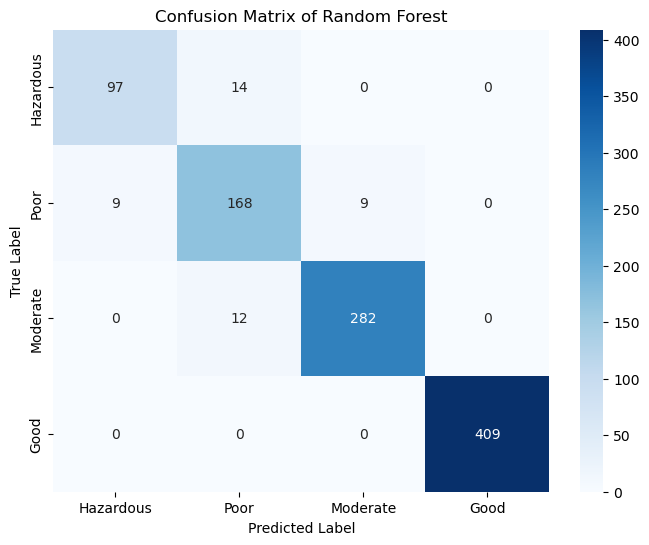

In [33]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Random Forest: {accuracy:.4f}")
print("\nClassification Report of Random Forest:")
print(classification_report(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Hazardous', 'Poor', 'Moderate', 'Good'], 
            yticklabels=['Hazardous', 'Poor', 'Moderate', 'Good'])
plt.title('Confusion Matrix of Random Forest')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

Accuracy of Naive Bayes Classifier: 0.9210

Classification Report of Naive Bayes Classifier:
              precision    recall  f1-score   support

           0       0.85      0.77      0.81       111
           1       0.78      0.86      0.82       186
           2       0.94      0.93      0.93       294
           3       1.00      0.99      0.99       409

    accuracy                           0.92      1000
   macro avg       0.89      0.88      0.89      1000
weighted avg       0.92      0.92      0.92      1000



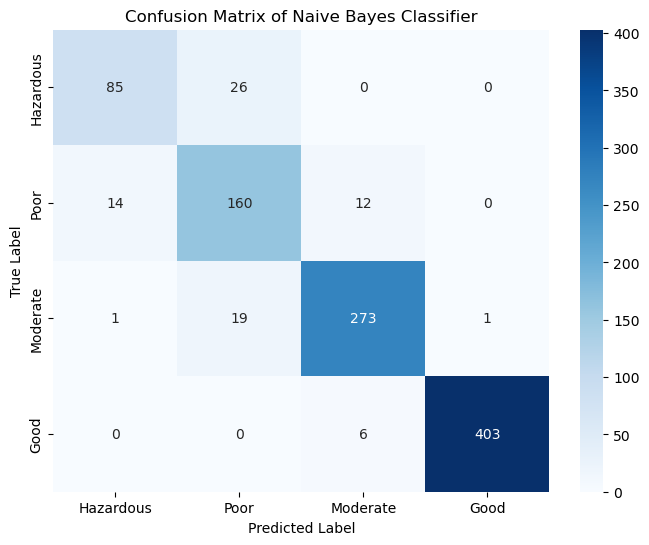

In [35]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred = nb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Naive Bayes Classifier: {accuracy:.4f}")
print("\nClassification Report of Naive Bayes Classifier:")
print(classification_report(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Hazardous', 'Poor', 'Moderate', 'Good'], 
            yticklabels=['Hazardous', 'Poor', 'Moderate', 'Good'])
plt.title('Confusion Matrix of Naive Bayes Classifier')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

Accuracy of SVM: 0.9430

Classification Report of SVM:
              precision    recall  f1-score   support

           0       0.90      0.81      0.85       111
           1       0.83      0.87      0.85       186
           2       0.95      0.96      0.96       294
           3       1.00      1.00      1.00       409

    accuracy                           0.94      1000
   macro avg       0.92      0.91      0.91      1000
weighted avg       0.94      0.94      0.94      1000



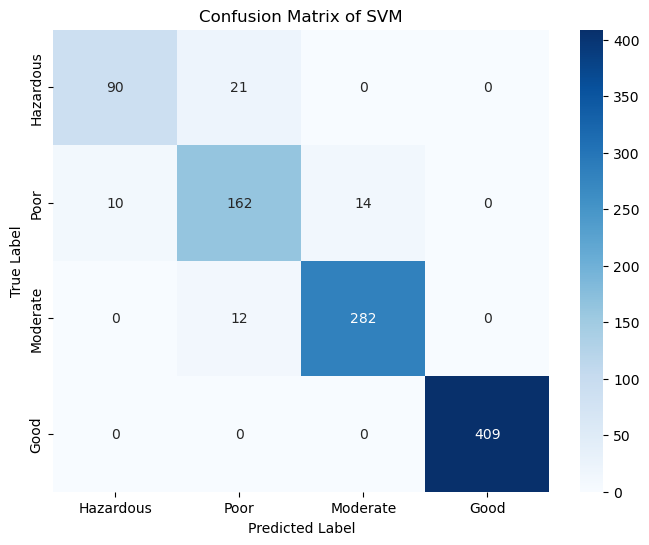

In [37]:
from sklearn.svm import SVC
svm_model = SVC(random_state=40, probability=True)
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of SVM: {accuracy:.4f}")
print("\nClassification Report of SVM:")
print(classification_report(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Hazardous', 'Poor', 'Moderate', 'Good'], 
            yticklabels=['Hazardous', 'Poor', 'Moderate', 'Good'])
plt.title('Confusion Matrix of SVM')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

Accuracy of AdaBoost: 0.8180

Classification Report of AdaBoost:
              precision    recall  f1-score   support

           0       0.87      0.72      0.79       111
           1       0.73      0.86      0.79       186
           2       0.70      0.90      0.79       294
           3       1.00      0.77      0.87       409

    accuracy                           0.82      1000
   macro avg       0.83      0.81      0.81      1000
weighted avg       0.85      0.82      0.82      1000



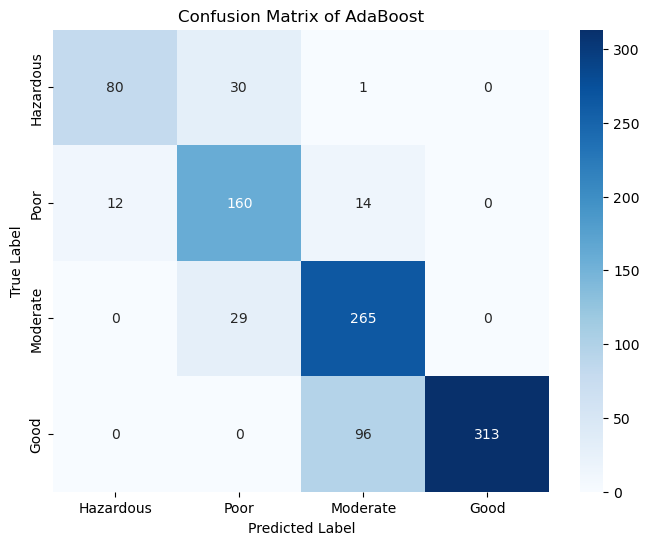

In [39]:
from sklearn.ensemble import AdaBoostClassifier
ada_model = AdaBoostClassifier(algorithm='SAMME', random_state=42)
ada_model.fit(X_train, y_train)
y_pred = ada_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of AdaBoost: {accuracy:.4f}")
print("\nClassification Report of AdaBoost:")
print(classification_report(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Hazardous', 'Poor', 'Moderate', 'Good'], 
            yticklabels=['Hazardous', 'Poor', 'Moderate', 'Good'])
plt.title('Confusion Matrix of AdaBoost')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001794 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2701
[LightGBM] [Info] Number of data points in the train set: 4000, number of used features: 11
[LightGBM] [Info] Start training from score -2.330470
[LightGBM] [Info] Start training from score -1.592089
[LightGBM] [Info] Start training from score -1.198985
[LightGBM] [Info] Start training from score -0.921932
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Accuracy of LGBM Classifier: 0.9640

Classification Report of LGBM Classifier:
              precision    recall  f1-score   support

           0       0.94      0.91      0.93       111
           1       0.90      0.91      0.91       186
           2       0.97      0.97      0.97       294
           3       1.00      1.00      1.00       409

    ac

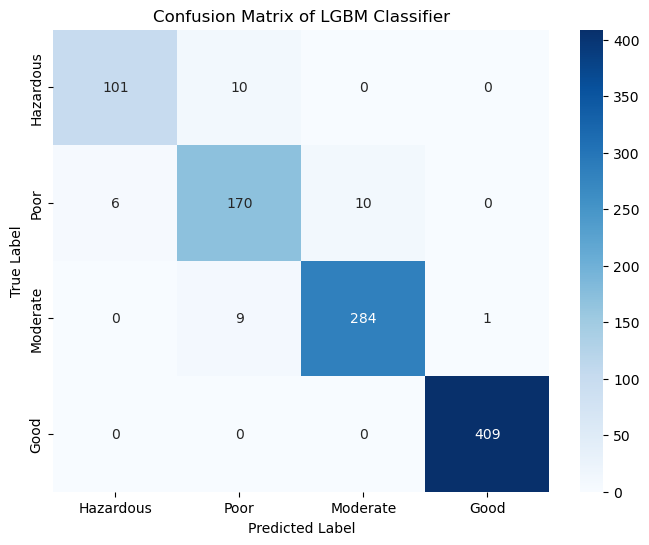

In [41]:
import lightgbm as lgb
model = lgb.LGBMClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of LGBM Classifier: {accuracy:.4f}")
print("\nClassification Report of LGBM Classifier:")
print(classification_report(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Hazardous', 'Poor', 'Moderate', 'Good'], yticklabels=['Hazardous', 'Poor', 'Moderate', 'Good'])
plt.title('Confusion Matrix of LGBM Classifier')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

Accuracy of Extra Trees Classifier: 0.9580

Classification Report of Extra Trees Classifier:
              precision    recall  f1-score   support

           0       0.93      0.86      0.90       111
           1       0.87      0.91      0.89       186
           2       0.97      0.96      0.97       294
           3       1.00      1.00      1.00       409

    accuracy                           0.96      1000
   macro avg       0.94      0.94      0.94      1000
weighted avg       0.96      0.96      0.96      1000



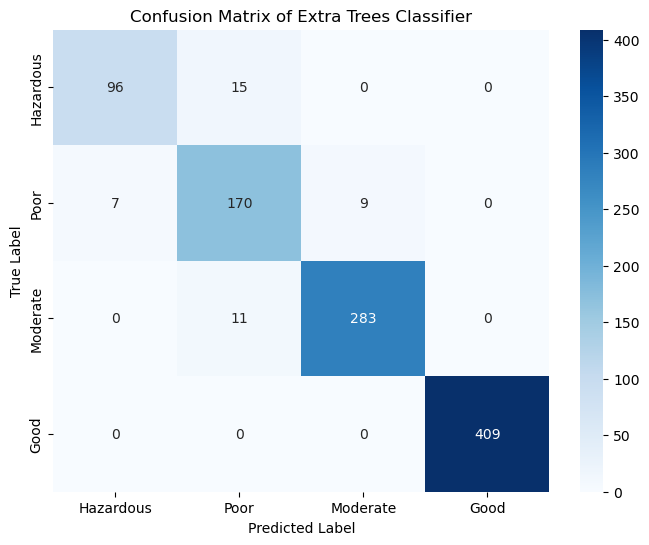

In [43]:
from sklearn.ensemble import ExtraTreesClassifier
extra_trees_model = ExtraTreesClassifier(random_state=42)
extra_trees_model.fit(X_train, y_train)
y_pred_et = extra_trees_model.predict(X_test)
accuracy_et = accuracy_score(y_test, y_pred_et)
print(f"Accuracy of Extra Trees Classifier: {accuracy_et:.4f}")
print("\nClassification Report of Extra Trees Classifier:")
print(classification_report(y_test, y_pred_et))
conf_matrix_et = confusion_matrix(y_test, y_pred_et)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_et, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Hazardous', 'Poor', 'Moderate', 'Good'], 
            yticklabels=['Hazardous', 'Poor', 'Moderate', 'Good'])
plt.title('Confusion Matrix of Extra Trees Classifier')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

Accuracy of CatBoost Classifier: 0.9610

Classification Report of CatBoost Classifier:
              precision    recall  f1-score   support

           0       0.93      0.89      0.91       111
           1       0.88      0.91      0.90       186
           2       0.97      0.97      0.97       294
           3       1.00      1.00      1.00       409

    accuracy                           0.96      1000
   macro avg       0.94      0.94      0.94      1000
weighted avg       0.96      0.96      0.96      1000



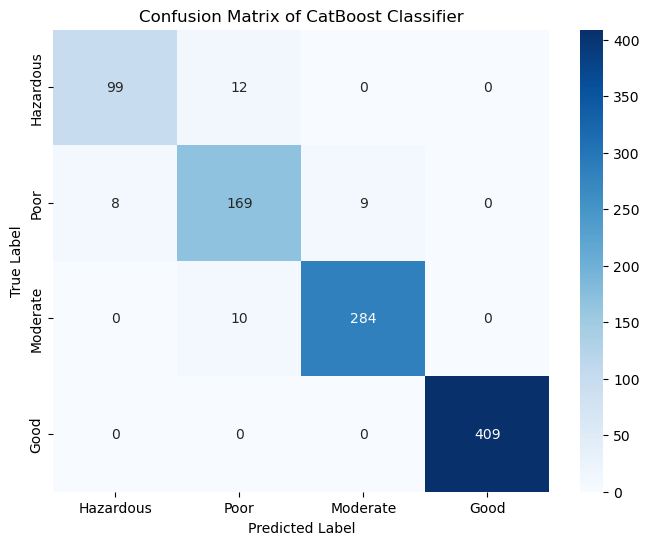

In [45]:
from catboost import CatBoostClassifier
catboost_model = CatBoostClassifier(random_state=42, verbose=0)
catboost_model.fit(X_train, y_train)
y_pred_cb = catboost_model.predict(X_test)
accuracy_cb = accuracy_score(y_test, y_pred_cb)
print(f"Accuracy of CatBoost Classifier: {accuracy_cb:.4f}")
print("\nClassification Report of CatBoost Classifier:")
print(classification_report(y_test, y_pred_cb))
conf_matrix_cb = confusion_matrix(y_test, y_pred_cb)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_cb, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Hazardous', 'Poor', 'Moderate', 'Good'], 
            yticklabels=['Hazardous', 'Poor', 'Moderate', 'Good'])
plt.title('Confusion Matrix of CatBoost Classifier')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

Accuracy of XGBoost Classifier: 0.9560

Classification Report of XGBoost Classifier:
              precision    recall  f1-score   support

           0       0.92      0.88      0.90       111
           1       0.87      0.90      0.89       186
           2       0.97      0.96      0.96       294
           3       1.00      1.00      1.00       409

    accuracy                           0.96      1000
   macro avg       0.94      0.94      0.94      1000
weighted avg       0.96      0.96      0.96      1000



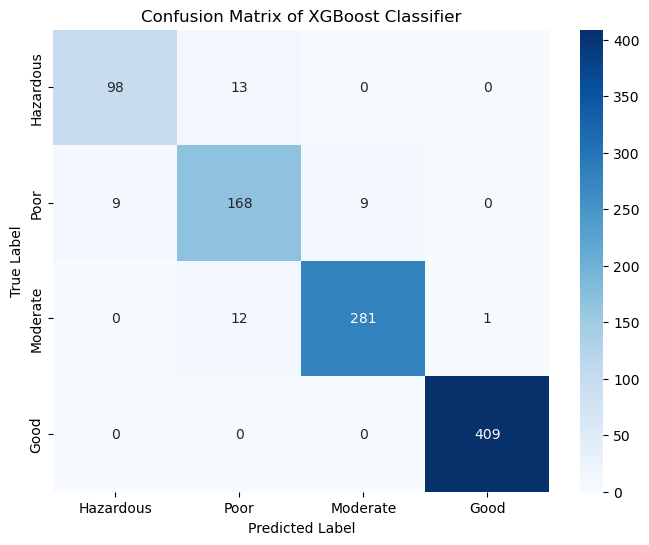

In [47]:
from xgboost import XGBClassifier
xgboost_model = XGBClassifier(random_state=42, eval_metric='mlogloss')
xgboost_model.fit(X_train, y_train)
y_pred_xgb = xgboost_model.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"Accuracy of XGBoost Classifier: {accuracy_xgb:.4f}")
print("\nClassification Report of XGBoost Classifier:")
print(classification_report(y_test, y_pred_xgb))
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Hazardous', 'Poor', 'Moderate', 'Good'], 
            yticklabels=['Hazardous', 'Poor', 'Moderate', 'Good'])
plt.title('Confusion Matrix of XGBoost Classifier')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

Accuracy of Bagging Classifier: 0.9370

Classification Report of Bagging Classifier:
              precision    recall  f1-score   support

           0       0.85      0.83      0.84       111
           1       0.82      0.87      0.84       186
           2       0.97      0.94      0.95       294
           3       1.00      1.00      1.00       409

    accuracy                           0.94      1000
   macro avg       0.91      0.91      0.91      1000
weighted avg       0.94      0.94      0.94      1000



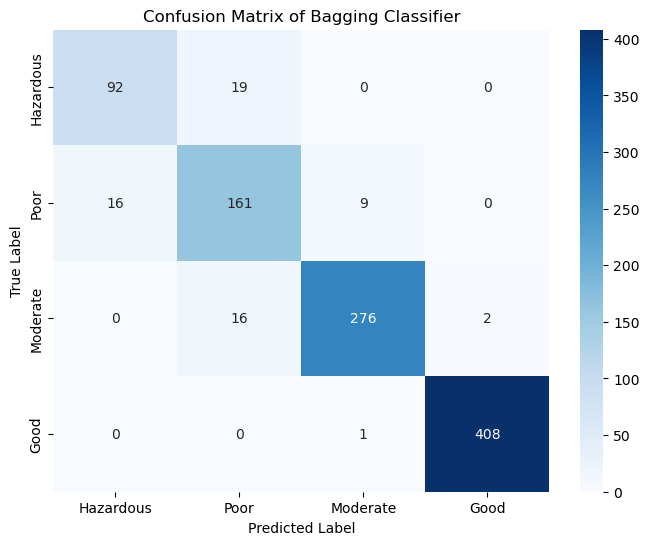

In [49]:
from sklearn.ensemble import BaggingClassifier
bagging_model = BaggingClassifier(random_state=42)
bagging_model.fit(X_train, y_train)
y_pred_bc = bagging_model.predict(X_test)
accuracy_bc = accuracy_score(y_test, y_pred_bc)
print(f"Accuracy of Bagging Classifier: {accuracy_bc:.4f}")
print("\nClassification Report of Bagging Classifier:")
print(classification_report(y_test, y_pred_bc))
conf_matrix_bc = confusion_matrix(y_test, y_pred_bc)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_bc, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Hazardous', 'Poor', 'Moderate', 'Good'], 
            yticklabels=['Hazardous', 'Poor', 'Moderate', 'Good'])
plt.title('Confusion Matrix of Bagging Classifier')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

Accuracy of SGD Classifier: 0.8530

Classification Report of SGD Classifier:
              precision    recall  f1-score   support

           0       0.88      0.82      0.85       111
           1       0.63      0.56      0.59       186
           2       0.77      0.85      0.81       294
           3       1.00      1.00      1.00       409

    accuracy                           0.85      1000
   macro avg       0.82      0.81      0.81      1000
weighted avg       0.85      0.85      0.85      1000



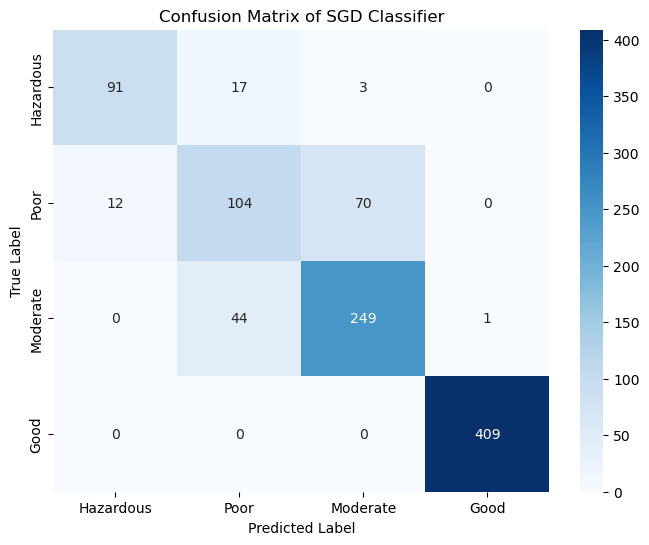

In [51]:
from sklearn.linear_model import SGDClassifier
sgd_model = SGDClassifier(random_state=42)
sgd_model.fit(X_train, y_train)
y_pred_sgd = sgd_model.predict(X_test)
accuracy_sgd = accuracy_score(y_test, y_pred_sgd)
print(f"Accuracy of SGD Classifier: {accuracy_sgd:.4f}")
print("\nClassification Report of SGD Classifier:")
print(classification_report(y_test, y_pred_sgd, zero_division=1))
conf_matrix_sgd = confusion_matrix(y_test, y_pred_sgd)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_sgd, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Hazardous', 'Poor', 'Moderate', 'Good'], 
            yticklabels=['Hazardous', 'Poor', 'Moderate', 'Good'])
plt.title('Confusion Matrix of SGD Classifier')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.savefig('SGD2.png')
plt.show()

Accuracy of Passive Aggressive Classifier: 0.7510

Classification Report of Passive Aggressive Classifier:
              precision    recall  f1-score   support

           0       0.95      0.32      0.47       111
           1       0.56      0.49      0.53       186
           2       0.62      0.99      0.77       294
           3       1.00      0.81      0.90       409

    accuracy                           0.75      1000
   macro avg       0.78      0.65      0.67      1000
weighted avg       0.80      0.75      0.74      1000



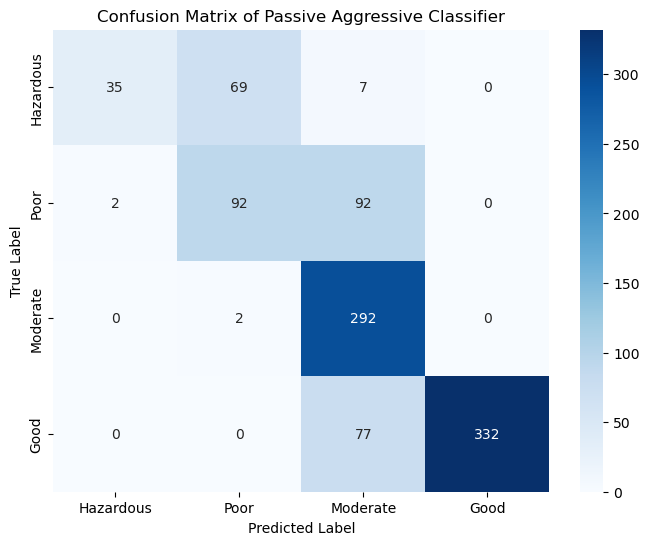

In [53]:
from sklearn.linear_model import PassiveAggressiveClassifier
pa_model = PassiveAggressiveClassifier(random_state=42)
pa_model.fit(X_train, y_train)
y_pred_pa = pa_model.predict(X_test)
accuracy_pa = accuracy_score(y_test, y_pred_pa)
print(f"Accuracy of Passive Aggressive Classifier: {accuracy_pa:.4f}")
print("\nClassification Report of Passive Aggressive Classifier:")
print(classification_report(y_test, y_pred_pa, zero_division=1))
conf_matrix_pa = confusion_matrix(y_test, y_pred_pa)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_pa, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Hazardous', 'Poor', 'Moderate', 'Good'], 
            yticklabels=['Hazardous', 'Poor', 'Moderate', 'Good'])
plt.title('Confusion Matrix of Passive Aggressive Classifier')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

Accuracy of Ridge Classifier: 0.7620

Classification Report of Ridge Classifier:
              precision    recall  f1-score   support

           0       0.74      0.38      0.50       111
           1       0.55      0.45      0.49       186
           2       0.72      0.78      0.75       294
           3       0.86      1.00      0.92       409

    accuracy                           0.76      1000
   macro avg       0.72      0.65      0.67      1000
weighted avg       0.75      0.76      0.74      1000



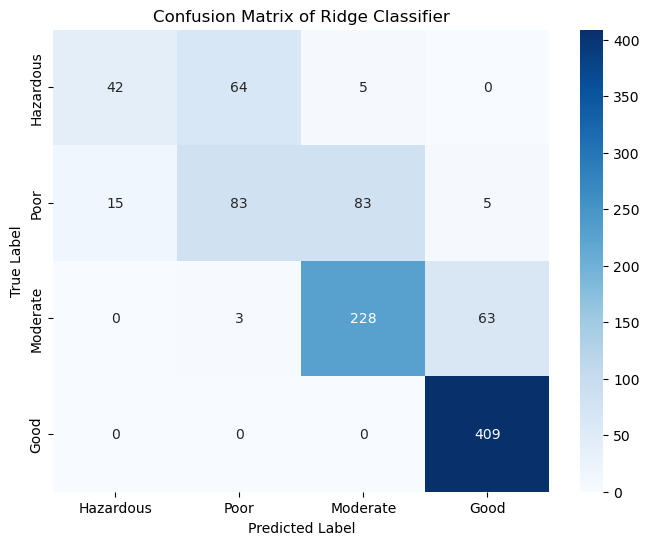

In [55]:
from sklearn.linear_model import RidgeClassifier
ridge_model = RidgeClassifier(random_state=42)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)
accuracy_ridge = accuracy_score(y_test, y_pred_ridge)
print(f"Accuracy of Ridge Classifier: {accuracy_ridge:.4f}")
print("\nClassification Report of Ridge Classifier:")
print(classification_report(y_test, y_pred_ridge, zero_division=1))
conf_matrix_ridge = confusion_matrix(y_test, y_pred_ridge)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_ridge, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Hazardous', 'Poor', 'Moderate', 'Good'], 
            yticklabels=['Hazardous', 'Poor', 'Moderate', 'Good'])
plt.title('Confusion Matrix of Ridge Classifier')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

Accuracy of Bernoulli Naive Bayes: 0.8260

Classification Report of Bernoulli Naive Bayes:
              precision    recall  f1-score   support

           0       0.69      0.59      0.64       111
           1       0.58      0.59      0.58       186
           2       0.82      0.83      0.83       294
           3       0.97      1.00      0.98       409

    accuracy                           0.83      1000
   macro avg       0.77      0.75      0.76      1000
weighted avg       0.82      0.83      0.82      1000



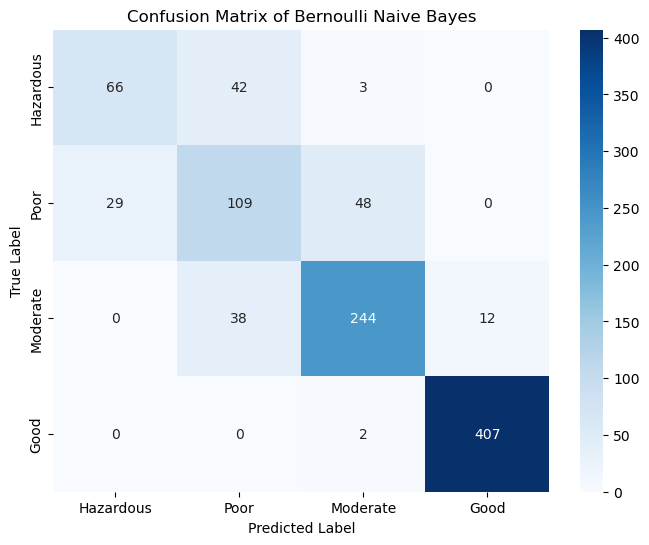

In [57]:
from sklearn.naive_bayes import BernoulliNB
bnb_model = BernoulliNB()
bnb_model.fit(X_train, y_train)
y_pred_bnb = bnb_model.predict(X_test)
accuracy_bnb = accuracy_score(y_test, y_pred_bnb)
print(f"Accuracy of Bernoulli Naive Bayes: {accuracy_bnb:.4f}")
print("\nClassification Report of Bernoulli Naive Bayes:")
print(classification_report(y_test, y_pred_bnb, zero_division=1))
conf_matrix_bnb = confusion_matrix(y_test, y_pred_bnb)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_bnb, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Hazardous', 'Poor', 'Moderate', 'Good'], 
            yticklabels=['Hazardous', 'Poor', 'Moderate', 'Good'])
plt.title('Confusion Matrix of Bernoulli Naive Bayes')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()